In [43]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Import the necessary methods from tweepy library
import tweepy
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream

In [3]:
import os
from dotenv import load_dotenv
from pathlib import Path  # python3 only

In [158]:
env_path = Path('..') / '.env'
load_dotenv(dotenv_path=env_path)

True

In [159]:
#Environemnt variables that contains the user credentials to access Twitter API 
access_token = os.getenv("Access_token")
access_token_secret = os.getenv("Access_token_secret")
consumer_key = os.getenv("API_key")
consumer_secret = os.getenv("API_secret_key")

In [94]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

In [95]:
try:
    redirect_url = auth.get_authorization_url()
except tweepy.TweepError:
    print('Error! Failed to get request token.')

In [ ]:
#api.update_status('tweepy + oauth!') #this posts tweets for you
#public_tweets = api.home_timeline()

- **If listening to a stream**

In [ ]:
def streaming_tweets():
    #This is a basic listener that just prints received tweets to stdout.
    class StdOutListener(StreamListener):

        def on_data(self, data):
            print(data)
            return True

        def on_error(self, status):
            print(status)

    #This handles Twitter authetification and the connection to Twitter Streaming API
    l = StdOutListener()
    stream = Stream(auth, l)

    #This line filter Twitter Streams to capture data by the keywords: 'GoT'
    stream.filter(track=['#GameofThrones'])

tweets_path = '../data/twitter_data.txt'

tweets_data = []
with open(tweets_path, "r") as f:
    for line in f:
        try:
            tweet = json.loads(line)
            tweets_data.append(tweet)
        except:
            continue

- **If searching for all hashtags since a certain day**

In [160]:
api = tweepy.API(auth)

In [161]:
gtweets = []
try:
    for tweet in tweepy.Cursor(api.search,q="#GameofThrones",count=100,
                               lang="en",
                               since="2019-05-18",
                               until="2019-05-19").items():
        gtweets.append(tweet)
except:
    print("Reached rate limit. Please try again later.")

Reached rate limit. Please try again later.


In [109]:
tweets_data = []
for line in gtweets:
    try:
        tweet = line._json
        tweets_data.append(tweet)
    except:
        continue

In [110]:
len(tweets_data)

12562

# Get tweets into a dataframe

In [111]:
tweets = pd.DataFrame()

In [18]:
tweets_data[0].keys()

dict_keys(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'metadata', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'retweeted_status', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'lang'])

In [112]:
interest = ['created_at', 'text','geo', 'coordinates','is_quote_status', 'retweet_count', 'favorite_count', 'lang']

> 'retweeted' is always False so retweet_count is more reliable.

> 'favorited' as well

In [113]:
for dim in interest:
    tweets[dim] = list(map(lambda tweet: tweet[dim], tweets_data))

In [114]:
tweets.sort_values("created_at", ascending = True).head(10)

,created_at,text,geo,coordinates,is_quote_status,retweet_count,favorite_count,lang
12561,Sun May 26 03:38:24 +0000 2019,RT @RottenTomatoes: Every season of #GameofThr...,None,None,False,757,0,en
12560,Sun May 26 03:38:36 +0000 2019,Just watched the season finale of #GameOfThron...,None,None,False,0,3,en
12559,Sun May 26 03:38:38 +0000 2019,Tyrion's quips the first season are just amazi...,None,None,False,0,0,en
12558,Sun May 26 03:38:46 +0000 2019,My dog left me this cryptic message this morni...,None,None,False,1,1,en
12557,Sun May 26 03:39:00 +0000 2019,RT @Thrones_Memes: People that don't watch #Ga...,None,None,False,6227,0,en
12556,Sun May 26 03:39:16 +0000 2019,RT @IndiiCreates: ✨ART RAFFLE✨\nThank you so m...,None,None,False,610,0,en
12555,Sun May 26 03:39:17 +0000 2019,"RT @theDALTONcastle: Yesterday, I requested my...",None,None,False,881,0,en
12554,Sun May 26 03:39:30 +0000 2019,"RT @CBR: #GameofThrones Fans Raise Over $25,00...",None,None,False,7,0,en
12553,Sun May 26 03:39:38 +0000 2019,"Well, I didn’t think I could do it. 🤭\n\nI did...",None,None,False,0,3,en
12552,Sun May 26 03:39:48 +0000 2019,RT @thronesfacts: HBO Exec @CaseyBloys says th...,None,None,False,76,0,en


In [5]:
tweets = pd.read_csv('../data/GoTweets.csv', index_col=0)

In [68]:
tweets.shape

(12711, 8)

In [23]:
tweets.head()

,created_at,text,geo,coordinates,is_quote_status,retweet_count,favorite_count,lang
0,Sun May 26 17:21:08 +0000 2019,RT @vincenzolandino: Flying dragon in augmente...,None,None,False,12,0,en
1,Sun May 26 17:21:05 +0000 2019,RT @GameOfThrones: The Last Watch.\nFrom @Jean...,None,None,False,2670,0,en
2,Sun May 26 17:21:04 +0000 2019,RT @GameOfThrones: The Last Watch.\nFrom @Jean...,None,None,False,2670,0,en
3,Sun May 26 17:21:03 +0000 2019,RT @GameOfThrones: The Last Watch.\nFrom @Jean...,None,None,False,2670,0,en
4,Sun May 26 17:20:58 +0000 2019,This woman deserved Better :(\n#GameOfThrones ...,None,None,False,0,0,en


In [115]:
tweets = tweets.fillna('NA')

In [116]:
tweets[tweets.geo != 'NA']

,created_at,text,geo,coordinates,is_quote_status,retweet_count,favorite_count,lang
589,Sun May 26 19:46:53 +0000 2019,Lots of fascia. Available now ebay for listing...,"{'type': 'Point', 'coordinates': [34.0522, -11...","{'type': 'Point', 'coordinates': [-118.243, 34...",False,0,1,en
883,Sun May 26 19:31:52 +0000 2019,Nice little haul from #mcmcomiccon #comics #ga...,"{'type': 'Point', 'coordinates': [51.50821756,...","{'type': 'Point', 'coordinates': [0.02840008, ...",False,0,0,en
1410,Sun May 26 19:02:00 +0000 2019,Whether you loved or hated the #gameofthrones ...,"{'type': 'Point', 'coordinates': [27.70698154,...","{'type': 'Point', 'coordinates': [-97.37391846...",False,0,0,en
1484,Sun May 26 18:58:21 +0000 2019,Not Today. #GameofThrones #StreetArt @ Stevens...,"{'type': 'Point', 'coordinates': [53.48273625,...","{'type': 'Point', 'coordinates': [-2.2341009, ...",False,0,0,en
1945,Sun May 26 18:34:34 +0000 2019,Great #gameofthrones #runningtour this morning...,"{'type': 'Point', 'coordinates': [55.20223, -6...","{'type': 'Point', 'coordinates': [-6.24791, 55...",False,0,0,en
2357,Sun May 26 18:12:30 +0000 2019,🔥I'm not a Princess. I'm a KHALEESI 🔥\nil vero...,"{'type': 'Point', 'coordinates': [41.41675991,...","{'type': 'Point', 'coordinates': [15.65217018,...",False,0,0,en
2433,Sun May 26 18:07:52 +0000 2019,oh Jon Snow always so perplexed that he even r...,"{'type': 'Point', 'coordinates': [41.22178762,...","{'type': 'Point', 'coordinates': [32.64740417,...",False,0,0,en
2732,Sun May 26 17:54:35 +0000 2019,The Lion 🦁 Guard should have been #GOT protect...,"{'type': 'Point', 'coordinates': [40.7114, -74...","{'type': 'Point', 'coordinates': [-74.0647, 40...",False,0,0,en
3150,Sun May 26 17:33:30 +0000 2019,LEARN TO FIGHT LIKE ARYA STARK FROM ARCHWAY SE...,"{'type': 'Point', 'coordinates': [38.62901739,...","{'type': 'Point', 'coordinates': [-90.20291351...",False,0,0,en
4791,Sun May 26 16:28:42 +0000 2019,Jon Snow \n\nDay 1 balitattooexpo\nTattoo Arti...,"{'type': 'Point', 'coordinates': [-8.63854626,...","{'type': 'Point', 'coordinates': [115.25518227...",False,0,0,en


In [117]:
def saveAsCoord(x):
    try:
        return tuple(x['coordinates'])
    except:
        return 'NA'

In [118]:
tweets['geo_cor'] = tweets.geo.apply(saveAsCoord)

In [119]:
tweets['cor_cor'] = tweets.coordinates.apply(saveAsCoord)

In [120]:
tweets[tweets.geo != 'NA']

,created_at,text,geo,coordinates,is_quote_status,retweet_count,favorite_count,lang,geo_cor,cor_cor
589,Sun May 26 19:46:53 +0000 2019,Lots of fascia. Available now ebay for listing...,"{'type': 'Point', 'coordinates': [34.0522, -11...","{'type': 'Point', 'coordinates': [-118.243, 34...",False,0,1,en,"(34.0522, -118.243)","(-118.243, 34.0522)"
883,Sun May 26 19:31:52 +0000 2019,Nice little haul from #mcmcomiccon #comics #ga...,"{'type': 'Point', 'coordinates': [51.50821756,...","{'type': 'Point', 'coordinates': [0.02840008, ...",False,0,0,en,"(51.50821756, 0.02840008)","(0.02840008, 51.50821756)"
1410,Sun May 26 19:02:00 +0000 2019,Whether you loved or hated the #gameofthrones ...,"{'type': 'Point', 'coordinates': [27.70698154,...","{'type': 'Point', 'coordinates': [-97.37391846...",False,0,0,en,"(27.70698154, -97.37391846)","(-97.37391846, 27.70698154)"
1484,Sun May 26 18:58:21 +0000 2019,Not Today. #GameofThrones #StreetArt @ Stevens...,"{'type': 'Point', 'coordinates': [53.48273625,...","{'type': 'Point', 'coordinates': [-2.2341009, ...",False,0,0,en,"(53.48273625, -2.2341009)","(-2.2341009, 53.48273625)"
1945,Sun May 26 18:34:34 +0000 2019,Great #gameofthrones #runningtour this morning...,"{'type': 'Point', 'coordinates': [55.20223, -6...","{'type': 'Point', 'coordinates': [-6.24791, 55...",False,0,0,en,"(55.20223, -6.24791)","(-6.24791, 55.20223)"
2357,Sun May 26 18:12:30 +0000 2019,🔥I'm not a Princess. I'm a KHALEESI 🔥\nil vero...,"{'type': 'Point', 'coordinates': [41.41675991,...","{'type': 'Point', 'coordinates': [15.65217018,...",False,0,0,en,"(41.41675991, 15.65217018)","(15.65217018, 41.41675991)"
2433,Sun May 26 18:07:52 +0000 2019,oh Jon Snow always so perplexed that he even r...,"{'type': 'Point', 'coordinates': [41.22178762,...","{'type': 'Point', 'coordinates': [32.64740417,...",False,0,0,en,"(41.22178762, 32.64740417)","(32.64740417, 41.22178762)"
2732,Sun May 26 17:54:35 +0000 2019,The Lion 🦁 Guard should have been #GOT protect...,"{'type': 'Point', 'coordinates': [40.7114, -74...","{'type': 'Point', 'coordinates': [-74.0647, 40...",False,0,0,en,"(40.7114, -74.0647)","(-74.0647, 40.7114)"
3150,Sun May 26 17:33:30 +0000 2019,LEARN TO FIGHT LIKE ARYA STARK FROM ARCHWAY SE...,"{'type': 'Point', 'coordinates': [38.62901739,...","{'type': 'Point', 'coordinates': [-90.20291351...",False,0,0,en,"(38.62901739, -90.20291351)","(-90.20291351, 38.62901739)"
4791,Sun May 26 16:28:42 +0000 2019,Jon Snow \n\nDay 1 balitattooexpo\nTattoo Arti...,"{'type': 'Point', 'coordinates': [-8.63854626,...","{'type': 'Point', 'coordinates': [115.25518227...",False,0,0,en,"(-8.63854626, 115.25518227)","(115.25518227, -8.63854626)"


In [121]:
tweets.isnull().sum()

created_at         0
text               0
geo                0
coordinates        0
is_quote_status    0
retweet_count      0
favorite_count     0
lang               0
geo_cor            0
cor_cor            0
dtype: int64

# EDA

In [122]:
tweets.describe()

,retweet_count,favorite_count
count,12562.000000,12562.000000
mean,3536.238417,3.432972
std,11367.865340,226.916060
min,0.000000,0.000000
25%,2.000000,0.000000
50%,121.000000,0.000000
75%,4533.000000,0.000000
max,203368.000000,25325.000000


In [123]:
# dig into the top retweets
for top in tweets.sort_values("retweet_count", ascending=False).text[:5]:
    print(top)

RT @LeoOfHyrule: I can’t stop watching this. That knife switch is clean! #GameOfThrones https://t.co/CmpPcDifgW
RT @LeoOfHyrule: I can’t stop watching this. That knife switch is clean! #GameOfThrones https://t.co/CmpPcDifgW
RT @LeoOfHyrule: I can’t stop watching this. That knife switch is clean! #GameOfThrones https://t.co/CmpPcDifgW
RT @LeoOfHyrule: I can’t stop watching this. That knife switch is clean! #GameOfThrones https://t.co/CmpPcDifgW
RT @LeoOfHyrule: I can’t stop watching this. That knife switch is clean! #GameOfThrones https://t.co/CmpPcDifgW


> one tweet can be counted multiple times -> drop duplicates

**Drop Duplicate Tweets**

In [124]:
tweets['date_at'] = pd.to_datetime(tweets.created_at)

In [79]:
tweets.apply(lambda x: any([type(y) is dict for y in x]))

created_at         False
text               False
geo                 True
coordinates         True
is_quote_status    False
retweet_count      False
favorite_count     False
lang               False
geo_cor            False
cor_cor            False
date_at            False
dtype: bool

In [125]:
drop_cols = ['created_at','geo','coordinates']

In [126]:
stweets = tweets.drop(drop_cols, axis = 1)\
    .drop_duplicates([x for x in tweets.columns if x not in drop_cols+['date_at']])

In [127]:
stweets.head()

,text,is_quote_status,retweet_count,favorite_count,lang,geo_cor,cor_cor,date_at
0,RT @Jungle_ZA: Now that #GameOfThrones has end...,False,682,0,en,NA,NA,2019-05-26 20:16:39+00:00
1,RT @GameOfThrones: The Last Watch.\nFrom @Jean...,False,4531,0,en,NA,NA,2019-05-26 20:16:37+00:00
2,RT @tukaaga: I wanna Arya In South Of Westeros...,False,3,0,en,NA,NA,2019-05-26 20:16:36+00:00
3,Less dialogue &amp; more MICHAEL BAY-EXPLOSION...,False,0,0,en,NA,NA,2019-05-26 20:16:36+00:00
4,RT @thronesfacts: HBO is releasing a 2 hour be...,False,168,0,en,NA,NA,2019-05-26 20:16:31+00:00


In [128]:
stweets.shape

(5131, 8)

### - dig into the top retweets

In [129]:
for top in stweets.sort_values("retweet_count", ascending=False).text[:5]:
    print(top)

RT @LeoOfHyrule: I can’t stop watching this. That knife switch is clean! #GameOfThrones https://t.co/CmpPcDifgW
RT @sbazzini8: Meanwhile in Winterfell...

#GameofThrones 
 https://t.co/ioRwL9DfHg
RT @OnFireGaspy: #GameOfThrones 

well shit.... https://t.co/1BZizwdsIa
RT @kamusigi9: Best ways to kill Cersei #GameofThrones 
1. Jaime kills Cersei
2. The Night King kills Cersei
3. Arya Kills Cersei
4. Drogon…
RT @heeyvesoul: #GameOfThrones

Jon: my real name is Aegon Targaryen 

Daenerys: https://t.co/yg0xTqED5U


Text(0.5, 1.0, 'Distribution of Number of Retweets')

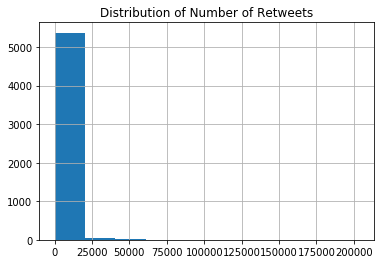

In [45]:
stweets['retweet_count'].hist()
plt.title("Distribution of Number of Retweets")

Text(0.5, 1.0, 'Distribution of Most Common Number of Retweets Occurrences')

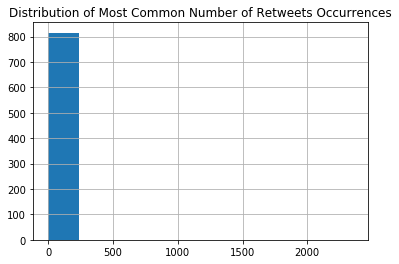

In [46]:
stweets['retweet_count'].value_counts().hist()
plt.title("Distribution of Most Common Number of Retweets Occurrences")

### - dig into the datetime -> show only after the show

In [130]:
stweets.head()

,text,is_quote_status,retweet_count,favorite_count,lang,geo_cor,cor_cor,date_at
0,RT @Jungle_ZA: Now that #GameOfThrones has end...,False,682,0,en,NA,NA,2019-05-26 20:16:39+00:00
1,RT @GameOfThrones: The Last Watch.\nFrom @Jean...,False,4531,0,en,NA,NA,2019-05-26 20:16:37+00:00
2,RT @tukaaga: I wanna Arya In South Of Westeros...,False,3,0,en,NA,NA,2019-05-26 20:16:36+00:00
3,Less dialogue &amp; more MICHAEL BAY-EXPLOSION...,False,0,0,en,NA,NA,2019-05-26 20:16:36+00:00
4,RT @thronesfacts: HBO is releasing a 2 hour be...,False,168,0,en,NA,NA,2019-05-26 20:16:31+00:00


In [131]:
for top in stweets.sort_values("date_at", ascending=False).text[:5]:
    print(top)

RT @Jungle_ZA: Now that #GameOfThrones has ended here are some other things you could watch. 

1. Your cholesterol 
2. Your blood sugar
3.…
RT @GameOfThrones: The Last Watch.
From @JeanieFinlay, the #GameofThrones documentary premieres tonight on @HBO. https://t.co/jmTaln8BnR
RT @tukaaga: I wanna Arya In South Of Westeros after Game Of Thrones like Alice In Wonderland. Do you? @GameOfThrones @GRRMspeaking  @Maisi…
Less dialogue &amp; more MICHAEL BAY-EXPLOSIONS, please.

#popculture #pop #culture #GameofThrones #thrones #less… https://t.co/JV1zImriZS
RT @thronesfacts: HBO is releasing a 2 hour behind-the-scenes documentary for #GameofThrones⁠ ⁠S8 called ‘The Last Watch’ tonight https://t…


### Only original tweets (not starting with RT)

In [132]:
for t in stweets[stweets.text.apply(lambda x: x[:2] != 'RT')].sort_values("retweet_count", ascending = False).head(5).text:
    print(t)

The Last Watch.
From @JeanieFinlay, the #GameofThrones documentary premieres tonight on @HBO. https://t.co/jmTaln8BnR
Happy birthday Stevie Nicks! Check out Rob Sheffield's recent interview with the goddess — where she discusses ever… https://t.co/jWIek1Fgf1
HBO is releasing a 2 hour behind-the-scenes documentary for #GameofThrones⁠ ⁠S8 called ‘The Last Watch’ tonight https://t.co/6iKRuLPbfK
The True King 👑 #GameOfThrones https://t.co/5MKb9yel3Y
Kawhi Leonard is the true King of the north 👑❄️
And soon the lord of the 7 kingdoms 

#NBAPlaoyffs #RaptorsVsBucks… https://t.co/nQ9wM97McO


In [133]:
otweets = stweets[stweets.text.apply(lambda x: x[:2] != 'RT')]

In [136]:
# percentage of orignal tweets
otweets.shape[0]/stweets.shape[0]

0.5566166439290586

Text(0.5, 1.0, 'original tweets')

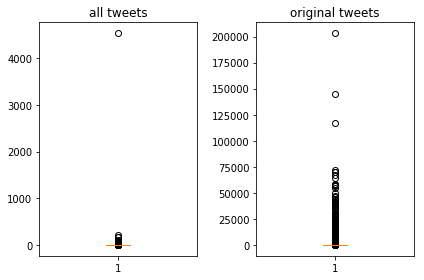

In [147]:
plt.subplot(1, 2, 1)
plt.boxplot(otweets.retweet_count)
plt.title("all tweets")
plt.subplot(1, 2, 2)
plt.boxplot(stweets.retweet_count)
plt.tight_layout()
plt.title("original tweets")